# Airline Company Clustering and ANN Model Predicts Customers Satisfaction - Alaa Zagha

# Problem
- An airline company would like to know more about their customers and how to please them. They have provided some information about 20,000 customers as well as the results of a satisfaction survey. The data is available here.

    - They would like you to:

1. Segment the customers into groups and describe those groups, what they have in common and how they differ.

2. Model the data to see if overall customer satisfaction can be predicted by information about their flights and answers to the survey other than overall satisfaction.

## Clustering Instructions:
The airline company would like you to segment the customers and create an analytical report on the clusters describing each group and describing how they are different.

1. Load the dataset.

2. Explore the data.

3. Prepare the data for modeling.

4. Use a KMeans model to cluster the passengers into an optimal number of clusters.

    - Use an elbow plot and silhouette score to find the optimal number of clusters.
    - There must be between 2 and 10 clusters.
5. Analyze and report on the clusters.

- Describe each cluster.
- How are the clusters different?
- Create 2 report quality explanatory visualizations showing important differences between the clusters.
- Interpret and explain each visualization.
## Modeling Instructions:
The airline would also like to know how well overall satisfaction can be predicted from information about passengers and satisfaction with specific parts of their experience. Your target will be the 'satisfied' column

- Use random_state = 42 for your train_test_split
- Use PCA to prepare the data for modeling.
- Reduce the number of features in the data
- Be sure to use the PCA-transformed data when you fit and validate your predictive model.
- Do not leak data while preparing your data for modeling.
- Use a deep learning model to predict whether customers will report that they were satisfied.
- Use the PCA-transformed data you created in Step 2.
- Create 3 different versions of a sequential model.
- Each new model should be an iteration of the previous model.
- Justify in writing why you changed what you did for each new model. (For example, why did you add layers, regularization, nodes, etc)
- Adding or reducing epochs does not count as a new model.
- Use some form of regularization with at least one model.
- Evaluate each model with multiple appropriate metrics.
- Choose a final model and justify your choice.
- Evaluate your final model with multiple metrics.
- Based on those metrics, explain in writing how well your model will solve the business problem.

## Importing Libraries

In [27]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 880.9 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 950.9 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
 #Import standard packages
import pandas as pd
import numpy as np
# Import modeling tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, classification_report, RocCurveDisplay, roc_auc_score
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from keras import backend
from tensorflow.keras.metrics import Recall, Precision
from keras_tuner import HyperParameters as hp
import keras_tuner as kt
from tensorflow.keras import metrics
import keras
# set the default output to pandas
from sklearn import set_config
set_config(transform_output='pandas')

## Loading Data

In [5]:
path = r'C:\Users\Lenovo\Downloads\flight_df - flight_df.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null  int64
 12  Leg room service  

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


## Data infocard
- 20000 categories
- 23 features
- all data is numerical we have ordinal data but its already encoded

In [6]:
df.duplicated().sum()

0

no duplicates good start

In [7]:
df.isna().sum()

Age                                  0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Gender_Male                          0
Loyal Customer                       0
Business Travel                      0
satisfied                            0
dtype: int64

no null values even better

In [8]:
df.describe()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,39.477250,2.027800,1188.548000,2.727950,3.056100,2.751100,2.971350,3.202100,3.255300,3.439100,...,3.623650,3.302850,3.635550,3.282650,14.318350,14.698250,0.490650,0.817850,0.687900,0.43305
std,15.108901,0.963054,1001.136957,1.326886,1.531134,1.396799,1.279575,1.332383,1.348485,1.323434,...,1.186837,1.259131,1.184017,1.311734,36.451829,36.899857,0.499925,0.385978,0.463362,0.49551
min,7.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,40.000000,2.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
75%,51.000000,3.000000,1733.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.00000
max,85.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000,1.00000


no inconsistent values, data is clean

# Clustering

In [9]:
# Scale the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

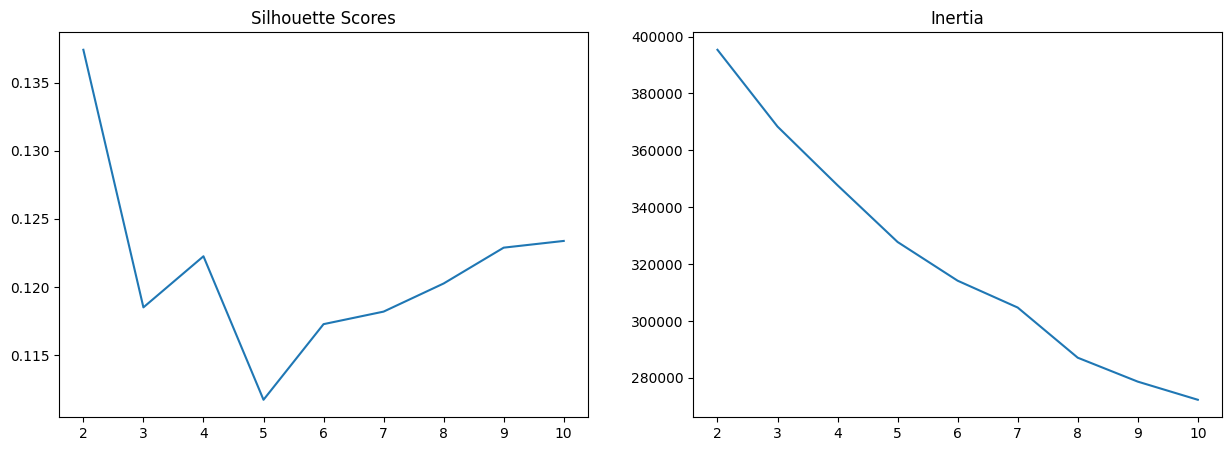

In [10]:
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

regarding the silhoutte score 2 and 4 are good number of clusters, however regarding the inertia there's an elbow at 3,5,7,8. To combine both inertia and silhoutte score im goin to choose 4 clusters

In [11]:
df1 = df.copy()

In [12]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, n_init= 'auto', random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,2,0,0,0,1,1,0,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,18,2,0,1,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,5,3,0,0,1,1,0,0,3
3,54,3,453,3,5,5,5,3,4,4,...,4,3,1,91,80,0,1,1,0,2
4,40,1,775,4,3,3,3,4,4,4,...,3,3,4,0,0,1,1,1,0,2


In [13]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,0,31.922796,1.607334,830.450354,2.391593,2.912074,2.574308,2.953249,1.767103,2.324040,...,3.720352,3.086640,3.750375,1.750375,16.685610,17.281364,0.540210,0.602402,0.623633,0.148831
1,1,43.224036,2.760942,1691.513361,3.264192,3.012567,3.133613,3.022389,3.678752,4.216236,...,4.223747,3.723819,4.216958,3.914343,12.999567,13.062112,0.500361,0.930810,0.977322,0.959988
2,2,45.962717,2.067926,1251.225485,2.554137,2.940756,2.771450,2.906282,3.141216,3.399387,...,2.213739,2.787028,2.188458,3.100102,14.835546,15.696885,0.402962,0.940501,0.725230,0.256639
3,3,35.895731,1.300356,731.085816,2.402623,3.372832,2.327924,2.968208,4.009115,2.616274,...,3.827257,3.328146,3.881503,4.057803,13.443753,13.669186,0.500667,0.760560,0.276567,0.070253


we have cluster 1 the most satisfied customers since they are the ones with the highest class where they suppose to have the highest quality of services, cluster 3 are the least satisfied since they are the economical class passenger least satisfied however they are the most satisfied with the food and drink, cluster 0 is the youngest customer segement, cluster has majority of females

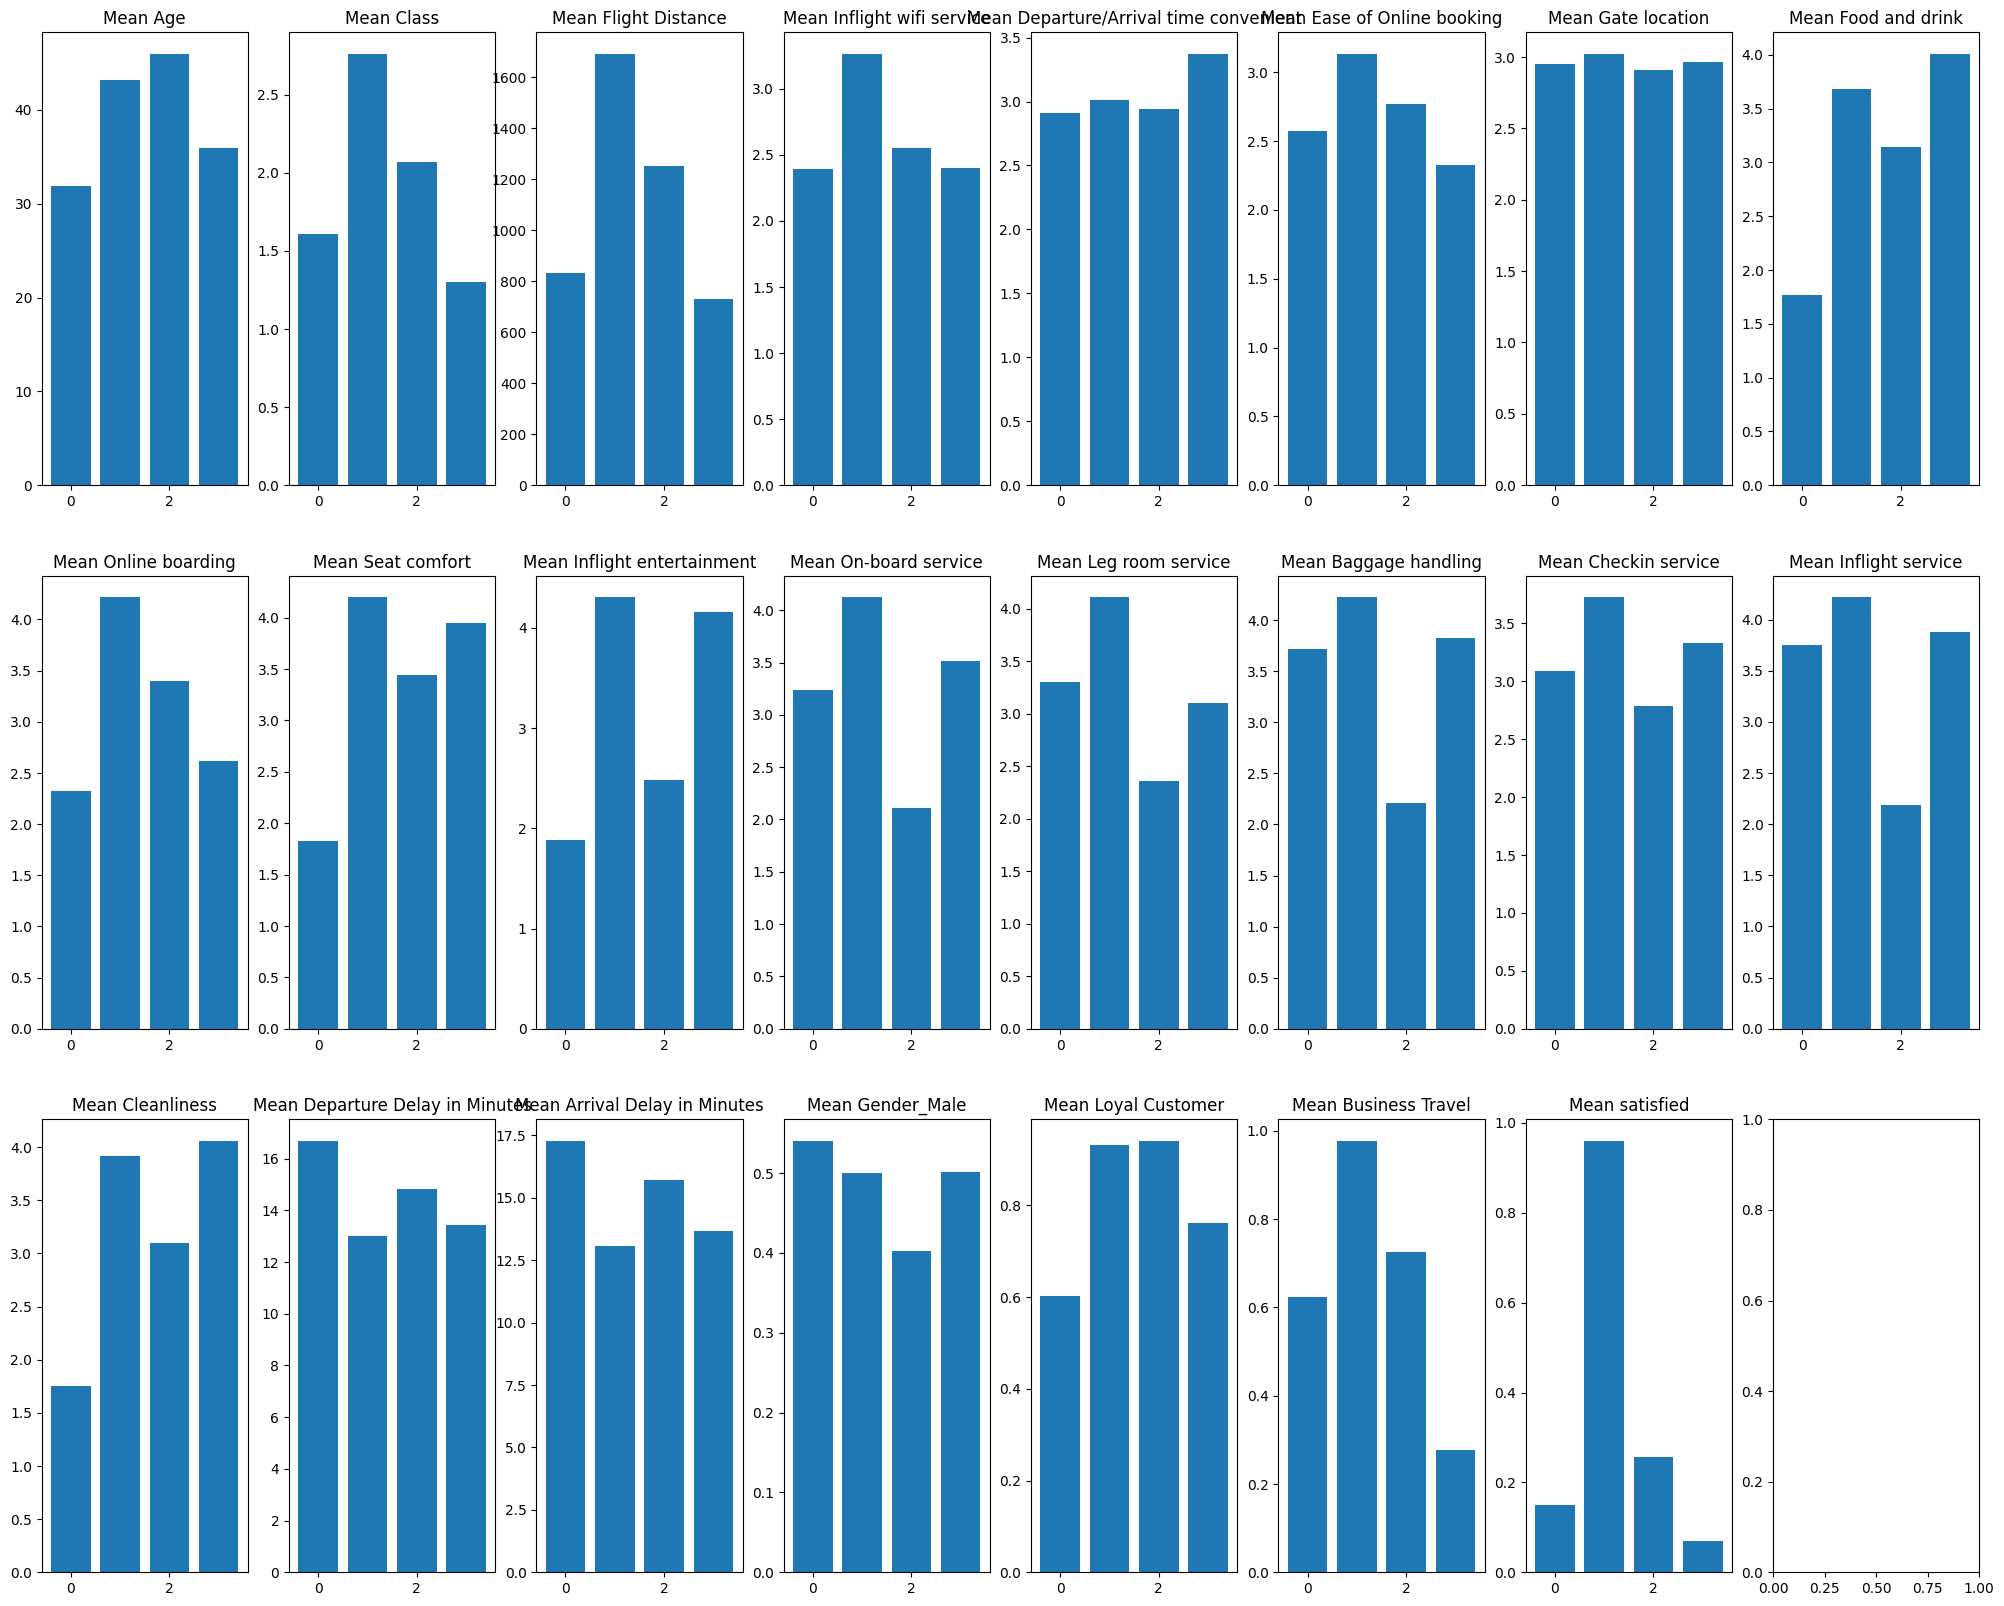

In [14]:
# Visualize means
fig, axes = plt.subplots(3,8, figsize = (25, 20))
# fig is an array of dimensions 3,8.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')


cluster 2 has the highest age, cluster 1 has the highest class, longest flights, best wifi services, most ease of online booking, best gate location, online boarding, most comfort seats, most inflight entertainment, best on board service, biggest leg room, best baggage handling, best checkin service, inflight service, most business travels and most satisfied customers

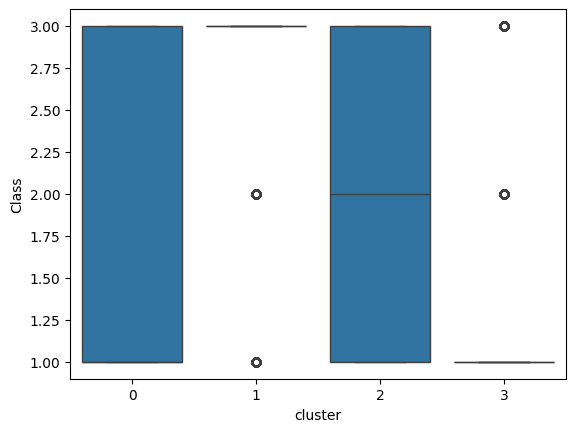

In [15]:
sns.boxplot(df, y = 'Class', x = 'cluster');

from this visualization we proove our point that cluster 1 are high class customers and cluster 3 is for economic class customers

# ANN Modeling

## checking if the target is balanced

In [16]:
df1['satisfied'].value_counts(normalize = True)

satisfied
0    0.56695
1    0.43305
Name: proportion, dtype: float64

the target is balanced, so we will consider the accuracy metric for this dataset

## Spliting the data

In [17]:
y = df1['satisfied']
X = df1.drop(columns = 'satisfied')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_tf = scaler.fit_transform(X_train)
X_test_tf = scaler.transform(X_test)

Using PCA to reduce features

In [19]:
pca = PCA(n_components=0.75, svd_solver = 'full')
pca.fit(X_train_tf)
X_train_pca = pca.transform(X_train_tf)
X_test_pca = pca.transform(X_test_tf)


In [20]:
pca.n_components_

9

In [21]:
input_shape = X_train_pca.shape[1]
input_shape

9

### Baseline ANN model

In [25]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(9, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
   # model.add(Dense(10,
               # activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model


In [23]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [26]:
model = build_model()

# Get model summary
model.summary()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train_pca, y_train,
                        validation_split = .2,
                        epochs=50,
                        verbose=0)

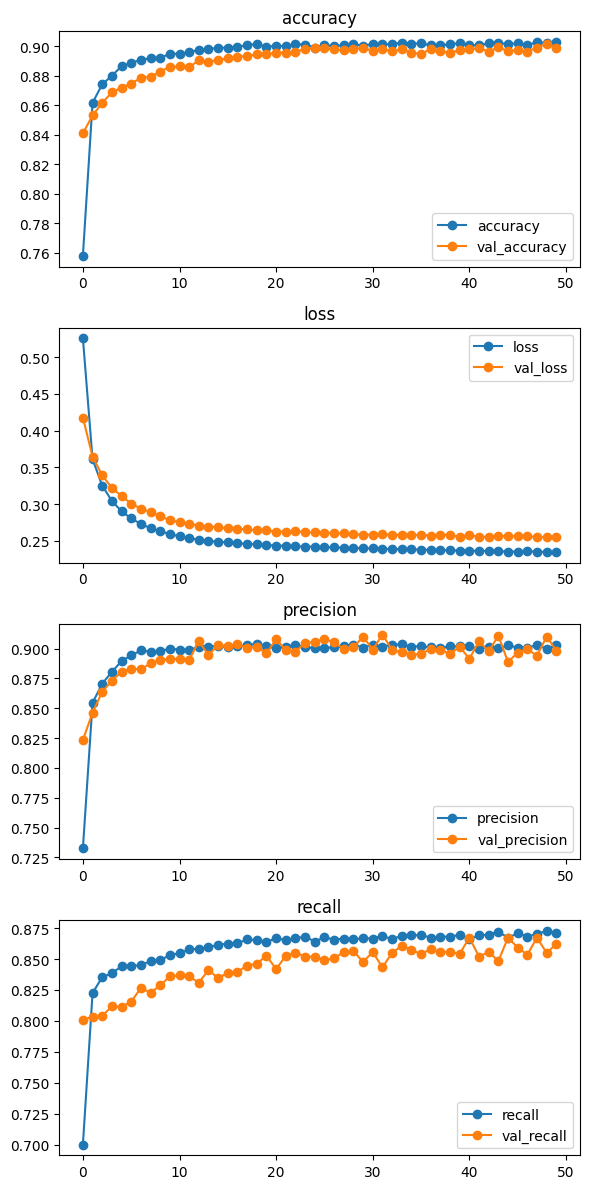

In [28]:
# plot learning
plot_history(history);

the baseline needs 20 epochs to learn, the model is not bad it can be better, it has a small overfitting, good loss ratio but can be a bit improved, as a first step we will add a dropout of .25 and reduce the epochs to 20

#### Evaluation

In [29]:
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  y_train_pred = np.round(y_train_pred)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  y_test_pred = np.round(y_test_pred)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [30]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      9051
           1       0.90      0.87      0.88      6949

    accuracy                           0.90     16000
   macro avg       0.90      0.90      0.90     16000
weighted avg       0.90      0.90      0.90     16000



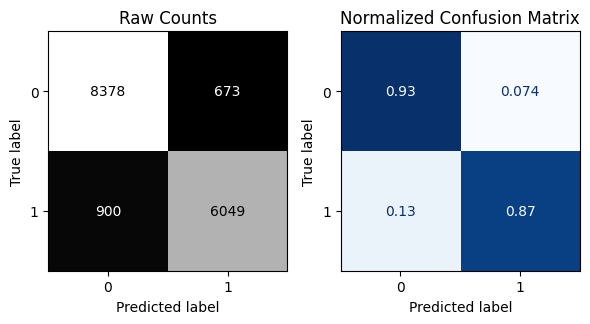


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2288
           1       0.90      0.87      0.88      1712

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



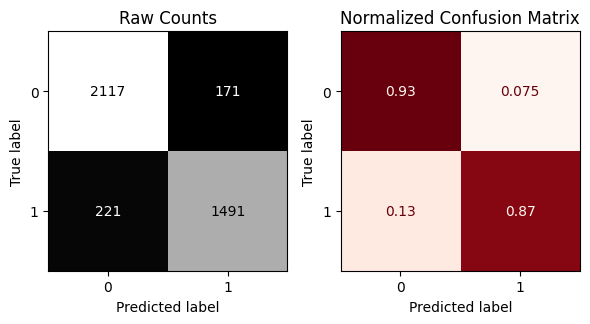

In [31]:
evaluate_classification(model, X_train_pca, y_train, X_test_pca, y_test)

regarding the confusion matrix the baseline is doing pretty well and no overfitting apears but lets assume there's overfitting and add a dropout

### ANN model with dropout of 25%

In [32]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(9, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dropout(0.25))
              
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model


In [33]:
model = build_model()

# Get model summary
model.summary()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(X_train_pca, y_train,
                        validation_split = .2,
                        epochs=20,
                        verbose=0)

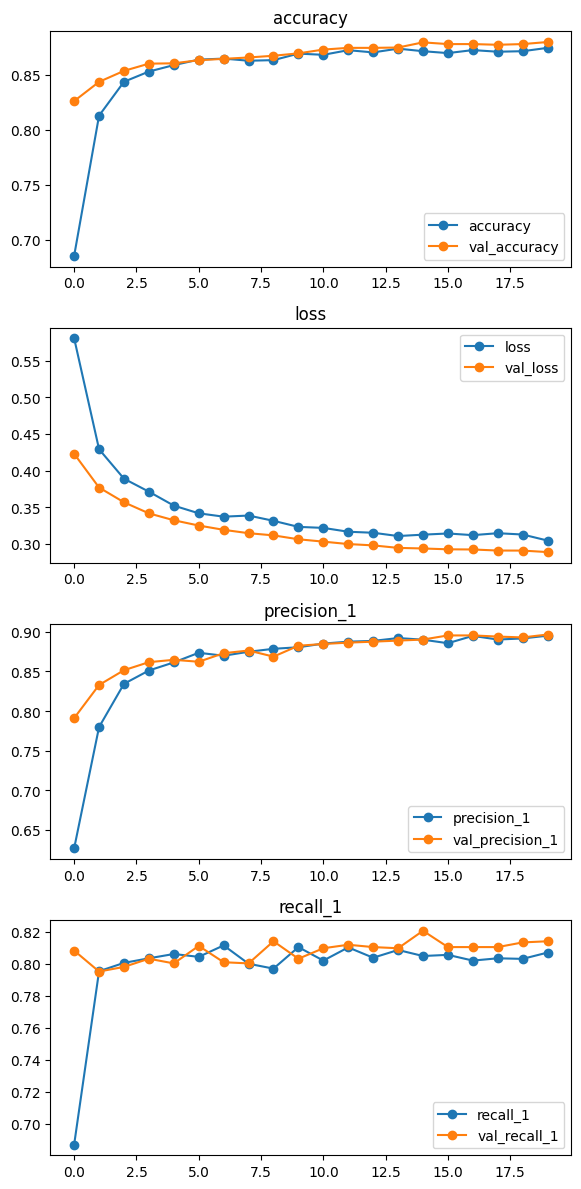

In [35]:
plot_history(history);

regarding the loss it seems it has less overfitting than the baseline model, but to improve it better lets run a hyperparameters tuning to get the best model

#### Evaluation

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.90      9051
           1       0.91      0.83      0.87      6949

    accuracy                           0.89     16000
   macro avg       0.89      0.88      0.89     16000
weighted avg       0.89      0.89      0.89     16000



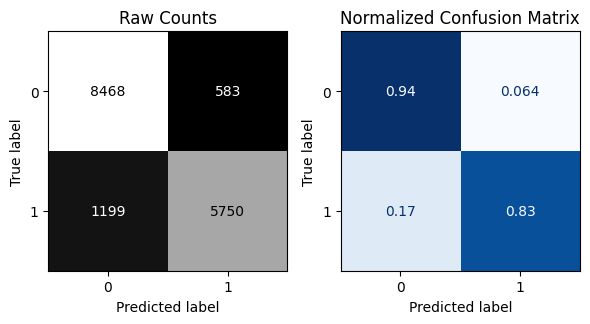


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2288
           1       0.90      0.84      0.87      1712

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



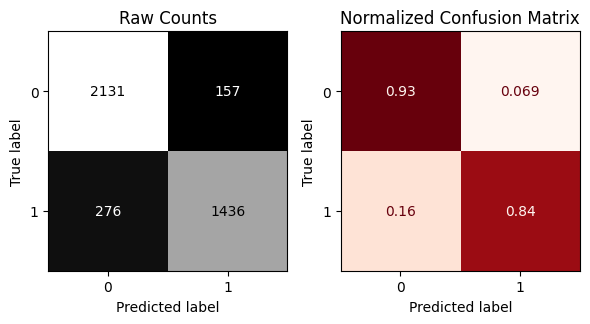

In [36]:
evaluate_classification(model, X_train_pca, y_train, X_test_pca, y_test)

so we had a better accuracy with the basline model, however we have less false positives in this model but more false negatives

### ANN model with hyperparameters tuning

In [37]:
# Build and Compile Model within a function to try different optimizers, units, and dropout values
def build_model(hp):
    # Instantiate Model
    model = Sequential()
    
    # Try different values for units
    model.add(Dense(units=hp.Int('units', min_value=1, max_value=9, step=1), activation='relu'))
    # Try different values for dropout rate
    model.add(Dropout(hp.Float(name="dropout_value", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation = 'sigmoid'))

# Compile Model
    # Try different optimizers
    optimizer_name = hp.Choice('optimizer',['rmsprop','nadam','adam'])
    learning_rate = hp.Choice('learning_rate',[0.01,0.001,0.0001])

    if optimizer_name == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'nadam':
        optimizer = keras.optimizers.Nadam(learning_rate=learning_rate)
    else:  # optimizer_name == 'adam'
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='bce',
                  metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model

In [38]:
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [55]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_recall',
                     max_epochs=20,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuning')

In [56]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train_pca, y_train,  epochs=50,
             validation_split = 0.2, callbacks = [early_stop])

Trial 30 Complete [00h 00m 23s]
val_recall: 0.8440233469009399

Best val_recall So Far: 0.8688046932220459
Total elapsed time: 00h 05m 09s


In [57]:
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'units': 8,
 'dropout_value': 0.0,
 'optimizer': 'nadam',
 'learning_rate': 0.01,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0013'}

In [58]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 11 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (32, 8)                     │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 8)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 1)                     │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
history = best_model.fit(X_train_pca, y_train,
                        validation_split = .2,
                        epochs=10,
                        verbose=0,
                    callbacks=[early_stop])

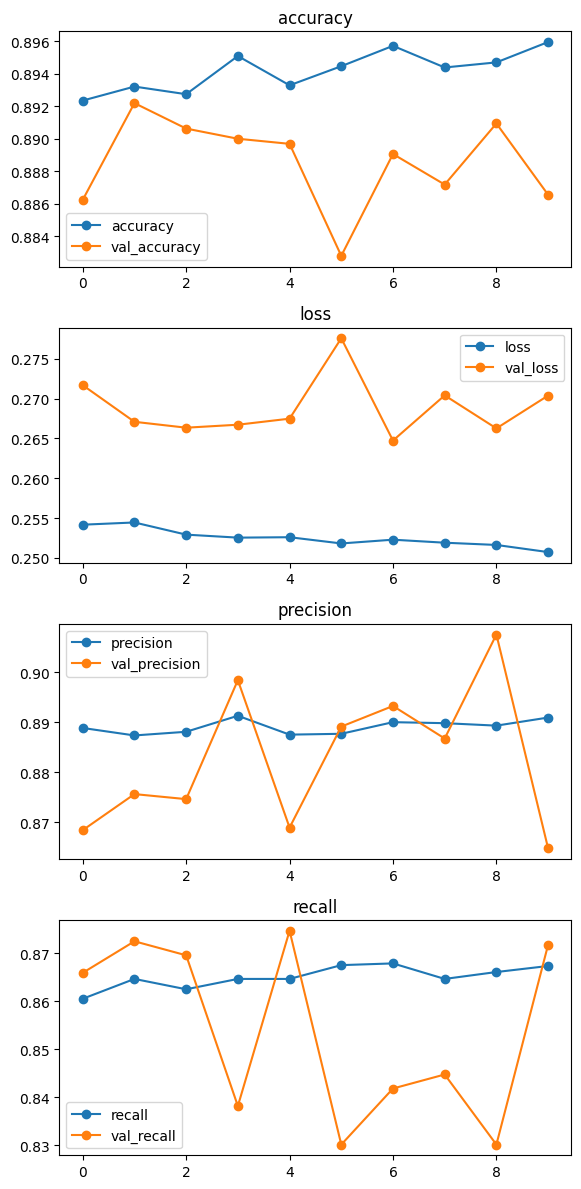

In [60]:
plot_history(history);

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      9051
           1       0.87      0.88      0.88      6949

    accuracy                           0.89     16000
   macro avg       0.89      0.89      0.89     16000
weighted avg       0.89      0.89      0.89     16000



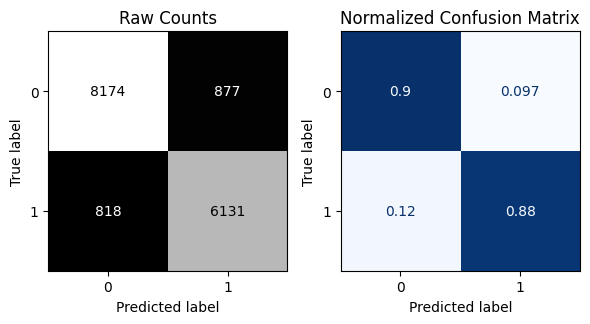


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2288
           1       0.87      0.88      0.88      1712

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



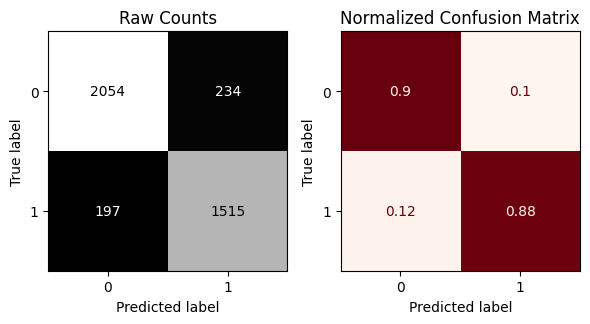

In [61]:
evaluate_classification(best_model,X_train_pca, y_train, X_test_pca, y_test)

after having the 3 different models the baseline model is the best model because it has more true predictions than the other 2 models, also higher accuracy no overfitting when checking out the confusion matrix but when checking the loss graph you will find a difference between the training data and the validation